In [1]:
# Author: Afif Shomali
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Datasets/AirbnbData/Feature_Engineered_Airbnb.csv")

# Exploratory Data Analysis of Airbnb Dataset

Source: Inside Airbnb accessed at https://insideairbnb.com/get-the-data/ (Used New York City Datasets, used listings & reviews data)  
License : [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

The listings dataset being used is one that has combined multiple months of data from Inside Airbnb, addtionaly, data preprocessing & cleaning was performed, see `PreProcessingAirbnb.ipynb` to see what changes were made.
Some Features are not present in the orginal data and where Engineered using the other columns and reviews dataset, see `FeatureEngineeringAirbnb.ipynb` to see what was done.

General Overview of this EDA:
- Get a feel for the dataset and produce some visualizations for the final report & slides
- Check Engineered columns and see which ones of them to keep for the modeling step
- Run some statisical tests if needed 

In [2]:
# Create an estimated bookings per year column & occupancy rate, using an estimated number of times the listing was booked based on number of reviews
# Using similar methodolody to https://commissions.sfplanning.org/cpcpackets/2014-001033PCA.pdf,
# We use the estimate 5 night average stay length suggested by the report
# The report suggests to assume that 72% of people who book an airbnb leave a review, 
# however Inside Airbnb suggests that this percentange may be lower, so we assume that around 50% 
# So using the reviews per month column, we divide by 0.5 to get the number of times per month a listing was booked
# Then to calculate occupancy rate by dividing bookings per year by 365 and cliping those above 1

df["bookings_per_year"] = (df["reviews_per_month"] / 0.5) * 12
estimated_booked_nights_per_year = df["bookings_per_year"] * 5
df["estimated_ococcupancy_rate"] = (estimated_booked_nights_per_year) / (365)
df["estimated_ococcupancy_rate"] = df["estimated_ococcupancy_rate"].clip(upper=1)

In [3]:
# Drop some more columns to make data managable
# Rationalle is that these columns are not adding much more value/are similar to another column already in the dataset
df.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'reviews_per_month', 'calculated_host_listings_count'], 
       inplace=True)

## Getting a idea how that Data is distributed

In [96]:
df.columns

Index(['id', 'last_scraped', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'num_host_ver

In [95]:
# Around 42 thousand rows, 68 columns 
# 4 of these will be what we are trying to predict
# Some of the columns I've left in for the purposes of visualizations and may not be used for predictions
df.shape

(42430, 68)

Text(0.5, 0, 'Price in USD ($)')

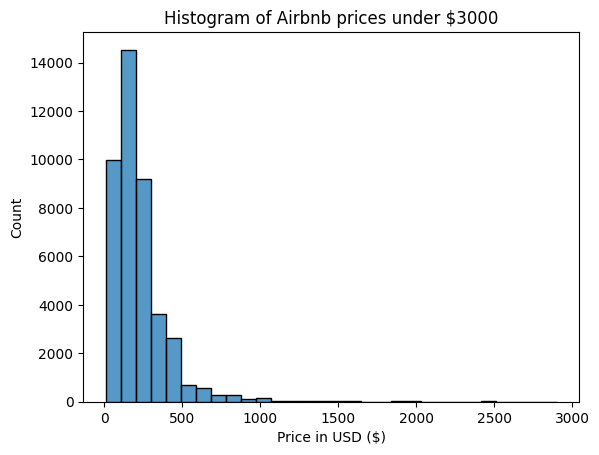

In [21]:
# Checking the distributions of variables we may try to predict such price, host_is_superhost, bookings_per_year or occupancy_rate

# Prices with extremely high prices removed
ax = sns.histplot(df[df["price"] < 3000]["price"], bins=30)
ax.set_title("Histogram of Airbnb prices under $3000")
ax.set_xlabel("Price in USD ($)")

We can see that the distributions of the prices of airbnb rentals is right skewed even when we remove all points with prices above 3000. We can use the logarithm of the price to get a less skewed distribution of values, if we end up trying to predict price, it will likely be better to use the log scaled price as our target, though for interpretability we would need to convert back to regular scale: 

Text(0.5, 0, 'Log Scale Price')

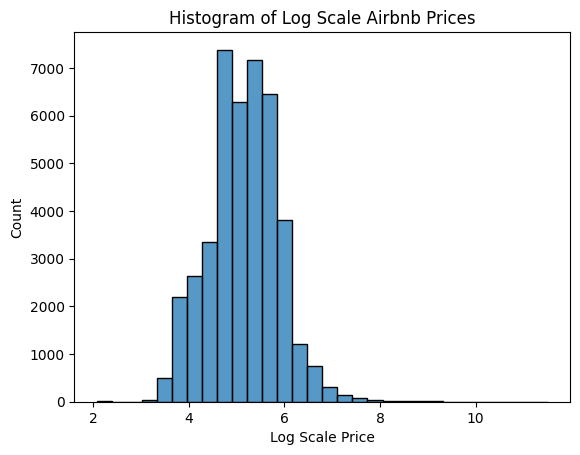

In [18]:
# Price in log scale
ax = sns.histplot(np.log(df["price"]), bins=30)
ax.set_title("Histogram of Log Scale Airbnb Prices")
ax.set_xlabel("Log Scale Price")

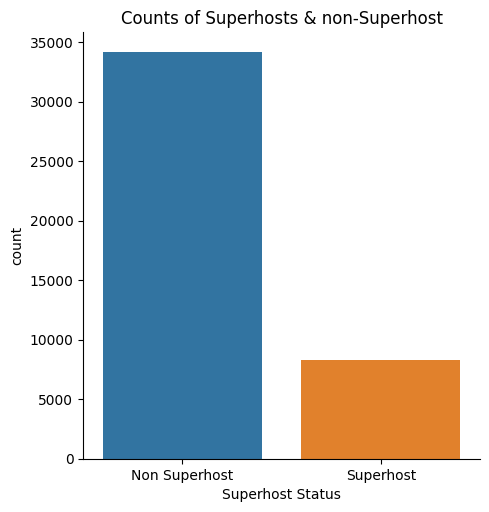

In [32]:
# Super host distribution

# 
ax = sns.catplot(x=df["host_is_superhost"], hue="host_is_superhost", data=df, kind="count", legend=False)
plt.title("Counts of Superhosts & non-Superhost")
ax.set_xticklabels(["Non Superhost", "Superhost"])
ax.set_xlabels("Superhost Status")

We see that this binary variable is unbalanced with their being more occurences of 

In [ ]:
# Prices vs some categorical variables distribtuions:
# neighbourhood/bourough, room_type, property_type, host_response_time or rate, host_identity_verified

In [ ]:
# Super_host vs categorical variables: 
# neighbourhood/bourough, room_type, property_type, host_response_time or rate, host_identity_verified

In [ ]:
# Listing yearly bookings vs categorical variables:
# neighbourhood/bourough, room_type, property_type, host_response_time or rate, host_identity_verified

In [ ]:
# Occupancy rate vs categorical variables:
# neighbourhood/bourough, room_type, property_type, host_response_time or rate, host_identity_verified

In [ ]:
# Prices grouped by bourough then roomtype

In [ ]:
# Pair plots

Text(0.5, 0.92, '3D scatter plot of Sentiment Analysis Scores')

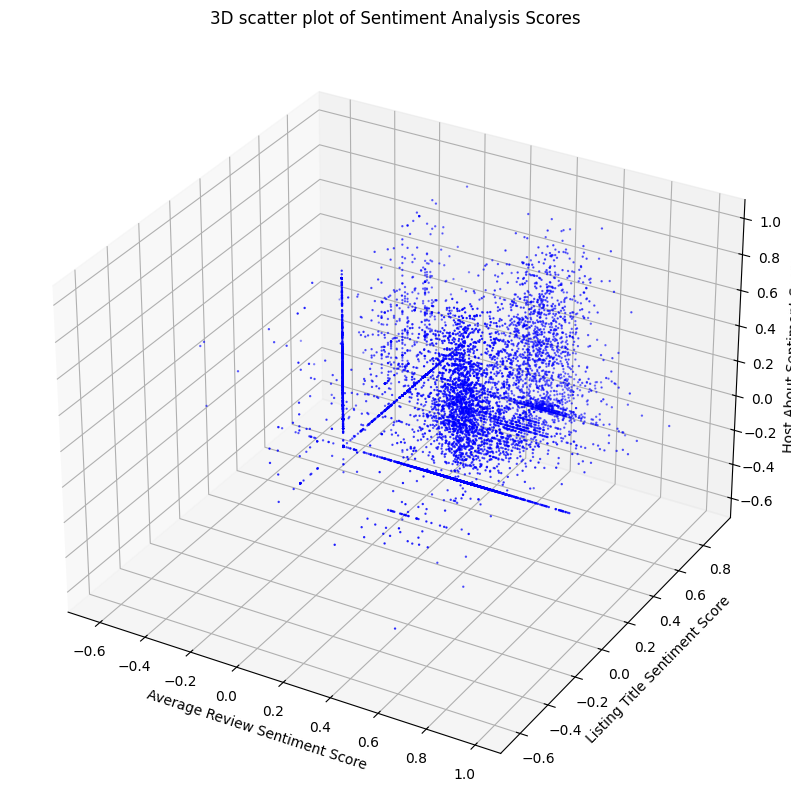

In [ ]:
# 3D Plot: Sentiment scores
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


sample = df.sample(n=10000)
ax.scatter(sample["average_review_sentiment_score"], sample["title_sentiment_score"], sample['host_about_sentiment_score'], c='b', marker='o', s=0.5)  # Scatter plot with small points

# Set labels
ax.set_xlabel('Average Review Sentiment Score')
ax.set_ylabel('Listing Title Sentiment Score')
ax.set_zlabel('Host About Sentiment Score')

plt.title("3D scatter plot of Sample of Sentiment Analysis Scores")

c:\Users\Afif\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0.92, '3D scatter plot')

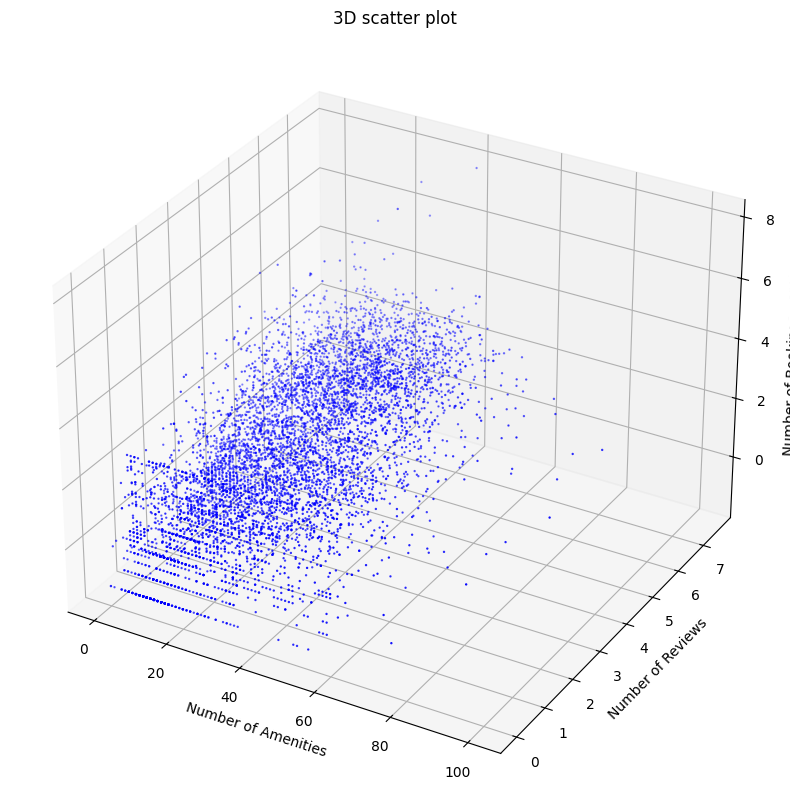

In [ ]:
# 3D Plot: amentities, reviews, bookings per year
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


sample = df.sample(n=10000)
ax.scatter(sample["num_amenities"], np.log(sample["number_of_reviews"]), np.log(sample['bookings_per_year']), c='b', marker='o', s=0.5)  # Scatter plot with small points

# Set labels
ax.set_xlabel('Number of Amenities')
ax.set_ylabel('Log scaled Number of Reviews')
ax.set_zlabel('Log scaled Number of Bookings per Year')

plt.title("3D scatter plot")

In [ ]:
# Extras:
# Locations of hosts with highest ratings on a map of NY

## Checking Featured Engineered columns to potentially drop

In [ ]:
# Check correlation plots/values, drop extermely low ones

# 